In [1]:
#hi,this is a stroke predictor project

import seaborn as sns
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv") 
#the dataset has to be in documents folder only

In [56]:
df.head()


gender   age hypertension heart_diesease  ever_married  work_type  \
0       1   3.0            0              0             0          4   
1       1  58.0            1              0             1          2   
2       0   8.0            0              0             0          2   
3       0  70.0            0              0             1          2   
4       1  14.0            0              0             0          1   

   residence avg_glucose_level   bmi  smoking_status stroke  
0          0             95.12  18.0               0      0  
1          1             87.96  39.2               2      0  
2          1            110.89  17.6               0      0  
3          0             69.04  35.9               1      0  
4          0            161.28  19.1               0      0

In [4]:
df.describe() 
#to get the descriptive statistics

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [5]:
df.sample(20)

id  gender   age  hypertension  heart_disease ever_married  \
4045  56195    Male  37.0             0              0          Yes   
3227  14517    Male  56.0             0              0          Yes   
2792  30752  Female  42.0             0              0           No   
926   17006    Male  19.0             0              0           No   
949   20044  Female  47.0             0              0          Yes   
2908  28400    Male  69.0             0              0          Yes   
3378  62090    Male  51.0             0              0           No   
2521  70845    Male  73.0             0              1          Yes   
3636   2903  Female  35.0             0              0           No   
3817  19043  Female  40.0             0              0           No   
3496  37395  Female  16.0             0              0           No   
975   23633  Female  37.0             0              0          Yes   
1539  29224    Male  30.0             0              0          Yes   
322   21956  Female  22.0             0              0           No   
4081  41191    Male  40.0             0              0          Yes   
2555   7171  Female  56.0             0              0          Yes   
3646  31712  Female  53.0             0              0          Yes   
4528   8920  Female  51.0             0              0          Yes   
964   59336    Male  66.0             1              0          Yes   
362   49916    Male  76.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
4045       Govt_job          Urban             156.69  35.2     never smoked   
3227        Private          Urban              82.25  30.5  formerly smoked   
2792  Self-employed          Urban              72.00  34.4     never smoked   
926         Private          Rural             119.04  35.9          Unknown   
949         Private          Rural              98.58  23.2     never smoked   
2908  Self-employed          Urban              92.73  27.7     never smoked   
3378  Self-employed          Rural             219.17  29.8     never smoked   
2521        Private          Rural              62.44  25.2           smokes   
3636        Private          Rural             123.83  23.8     never smoked   
3817        Private          Rural              99.00  25.0     never smoked   
3496        Private          Urban              63.63  20.0           smokes   
975         Private          Rural              83.65  42.1           smokes   
1539        Private          Urban              91.23   NaN           smokes   
322         Private          Urban              69.94  22.8          Unknown   
4081        Private          Rural              64.84  26.6     never smoked   
2555       Govt_job          Urban             102.51  55.7          Unknown   
3646        Private          Urban              88.38  25.4     never smoked   
4528  Self-employed          Rural              76.35  33.5  formerly smoked   
964         Private          Rural              74.90  32.1     never smoked   
362         Private          Rural             110.99  29.8  formerly smoked   

      stroke  
4045       0  
3227       0  
2792       0  
926        0  
949        0  
2908       0  
3378       0  
2521       0  
3636       0  
3817       0  
3496       0  
975        0  
1539       0  
322        0  
4081       0  
2555       0  
3646       0  
4528       0  
964        0  
362        0

In [6]:
df.info() 
#column name datatype ,get to know non null data where where 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#data cleaning 
#id removal becoz not nexcceasry 
df.drop(['id'],axis=1,inplace=True)  
#axis =1 mttlb column ,else axis =0 means row ,
#inplace =true means changes to thhe old existing frame only no new df is created 

In [8]:
df.head(200)

gender   age  hypertension  heart_disease ever_married      work_type  \
0      Male  67.0             0              1          Yes        Private   
1    Female  61.0             0              0          Yes  Self-employed   
2      Male  80.0             0              1          Yes        Private   
3    Female  49.0             0              0          Yes        Private   
4    Female  79.0             1              0          Yes  Self-employed   
..      ...   ...           ...            ...          ...            ...   
195    Male  59.0             0              0          Yes        Private   
196    Male  70.0             1              0          Yes        Private   
197    Male  69.0             0              0          Yes        Private   
198    Male  79.0             0              0          Yes        Private   
199  Female  74.0             0              0          Yes  Self-employed   

    Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0            Urban             228.69  36.6  formerly smoked       1  
1            Rural             202.21   NaN     never smoked       1  
2            Rural             105.92  32.5     never smoked       1  
3            Urban             171.23  34.4           smokes       1  
4            Rural             174.12  24.0     never smoked       1  
..             ...                ...   ...              ...     ...  
195          Urban             200.62  35.8  formerly smoked       1  
196          Rural             242.52  45.5  formerly smoked       1  
197          Rural              93.81  28.5          Unknown       1  
198          Rural             114.77   NaN  formerly smoked       1  
199          Urban              74.96  26.6     never smoked       1  

[200 rows x 11 columns]

In [9]:
#removing duplicate values 
df.drop_duplicates(inplace=True)

In [10]:
    df.isnull().sum()
#if null hai to give its count

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#you see bmi me null hai 
median1=df['bmi'].median()

In [12]:
df['bmi'].fillna(median1,inplace=True) 
#if null hai to usak sum phir har column ka sum 
#replaced the null value with medi

In [13]:
df.isnull().sum() 
#kuch to sum nikla jo akshatt smjhayega

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

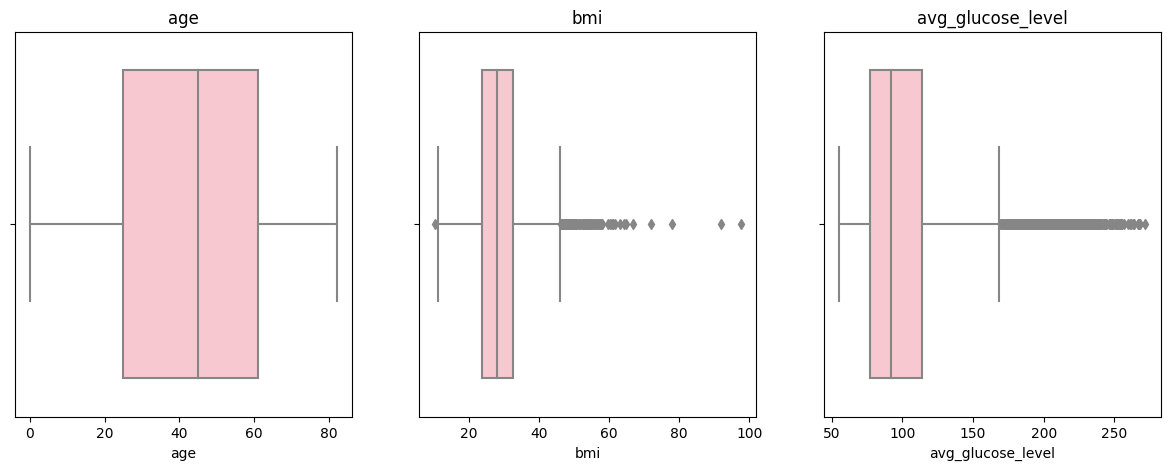

In [14]:
#outliers handling 
cols=['age' ,'bmi' ,'avg_glucose_level']
plt.figure(figsize=(20,5))
for i in range (3):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=df[cols[i]],color='pink')
    #i+1 is the current pos in subplot 
    plt.title(cols[i])

plt.show()
    



In [15]:
def detect_outlier(data,column):
    q1=df[column].quantile(.25)
    q3=df[column].quantile(.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    ls=df.index[(df[column] <lower_bound) | (df[column] >upper_bound)]
    return ls


In [16]:
index_list=[]
for column in cols:
    index_list.extend(detect_outlier(df,column))
index_list=sorted(set(index_list))

In [17]:
before= df.shape
#shape return rows*cols
df=df.drop(index_list)
after=df.shape
print(before ,after)



(5110, 11) (4391, 11)


In [18]:
#data visualisation
custom_palette = ["pink","cornflowerblue","gainsboro","steelblue","linen"]
sns.set_palette(custom_palette)

Text(0.5, 1.0, 'Count by Gender')

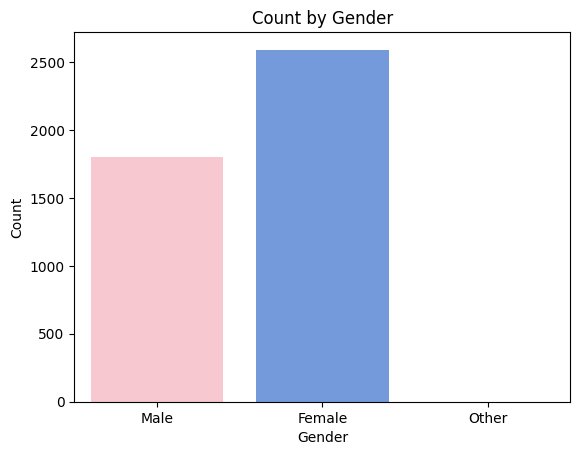

In [19]:
#gender vs count
sns.countplot(x='gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count by Gender')

In [20]:
#married vs not married
married=dict(df['ever_married'].value_counts())
fig=px.pie(names=married.keys(),values=married.values(),title="Martial Status",color_discrete_sequence=custom_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')



In [21]:
#had stroke 
strokes=dict(df['stroke'].value_counts())
fig=px.pie(names=strokes.keys(),values=strokes.values(),title="Had A stroke",color_discrete_sequence=custom_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')


Text(0.5, 1.0, 'Count of Strokes by Gender')

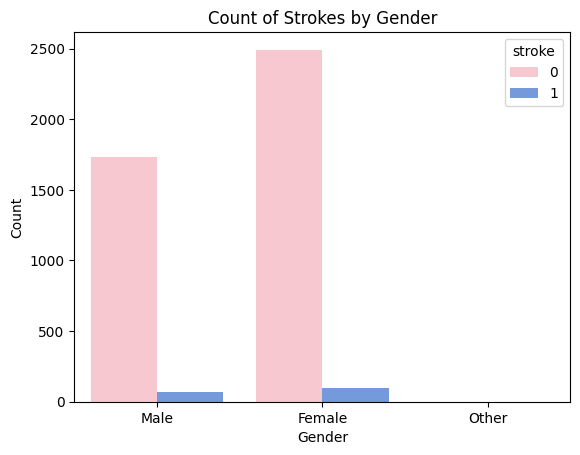

In [22]:
#on the basis of gender 
#gender and stroke 
#gender and hypertension

sns.countplot(x='gender', hue='stroke', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Strokes by Gender')

 


Text(0.5, 1.0, 'Count of Hypertension by Gender')

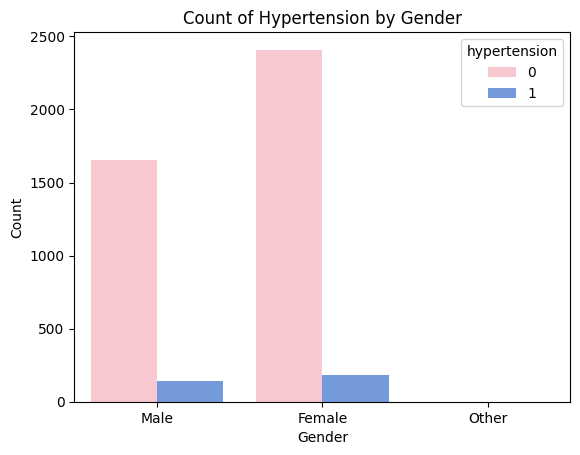

In [23]:


sns.countplot(x='gender', hue='hypertension', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Hypertension by Gender')
 

Text(0.5, 1.0, 'Count of Heart Disease by Gender')

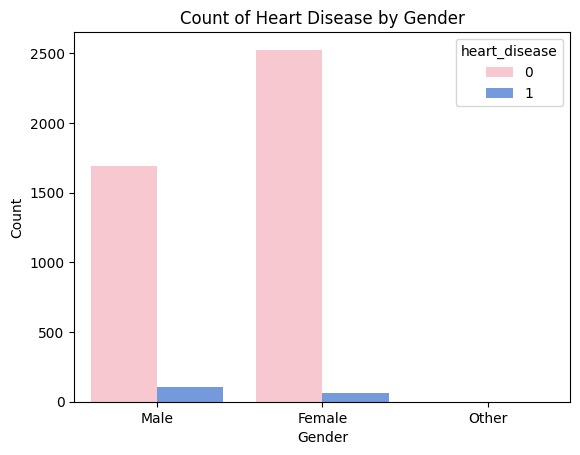

In [24]:

sns.countplot(x='gender', hue='heart_disease', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Gender')
 

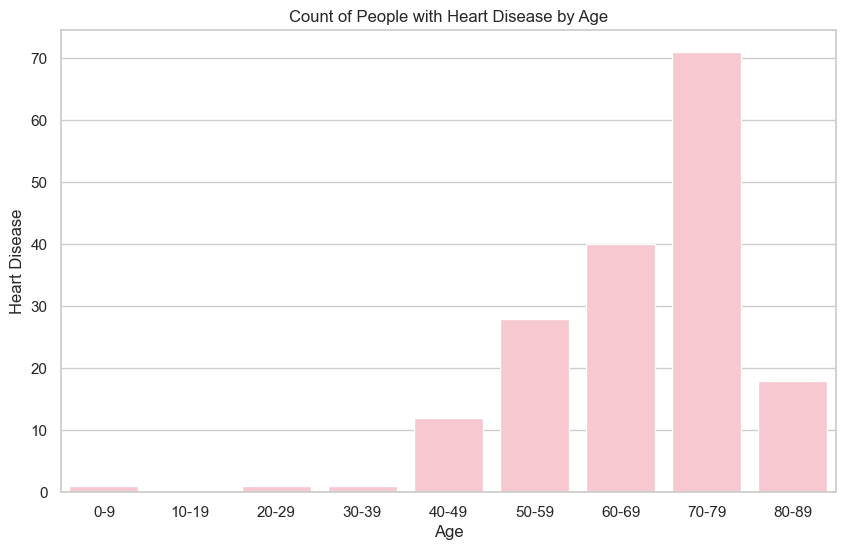

In [25]:
# Group data by age and sum heart disease values
age_bins = [0,10,20, 30, 40, 50, 60, 70,80,90]
age_labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89']

# Group age values into age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
heart_disease_counts = df.groupby('age_group')['heart_disease'].apply(lambda x: (x == 1).sum()).reset_index()

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='heart_disease', data=heart_disease_counts, color='pink')

plt.title('Count of People with Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.show()

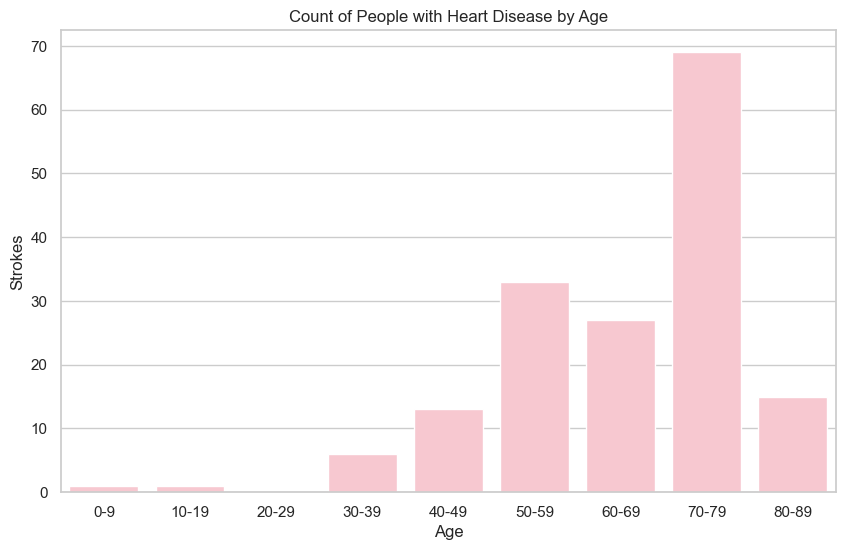

In [26]:
# Group data by age and sum heart disease values
age_bins = [0,10,20, 30, 40, 50, 60, 70,80,90]
age_labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89']

# Group age values into age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
heart_disease_counts = df.groupby('age_group')['stroke'].apply(lambda x: (x == 1).sum()).reset_index()

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='stroke', data=heart_disease_counts, color='pink')

plt.title('Count of People with Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Strokes')
plt.show()

In [27]:
#work type
worktypew=dict(df['work_type'].value_counts())
fig=px.pie(names=worktypew.keys(),values=worktypew.values(),title="Worktype",color_discrete_sequence=custom_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')


In [28]:
#residence type
res=dict(df['Residence_type'].value_counts())
fig=px.pie(names=res.keys(),values=res.values(),title="Residence type",color_discrete_sequence=custom_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')


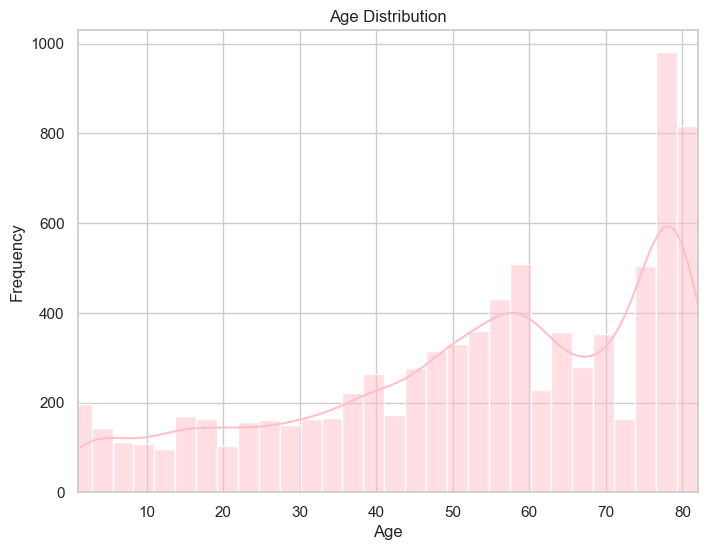

C:\Users\Akshra_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Akshra_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



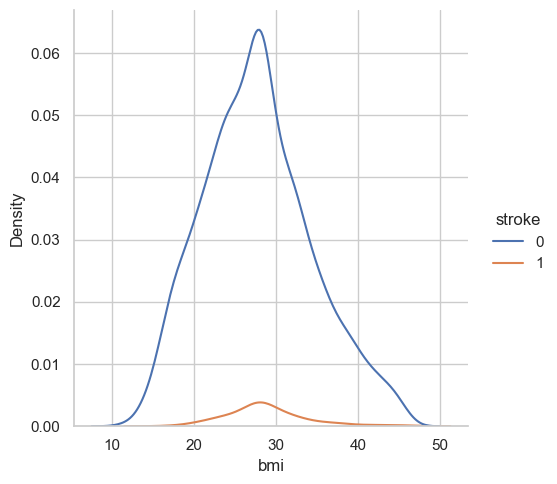

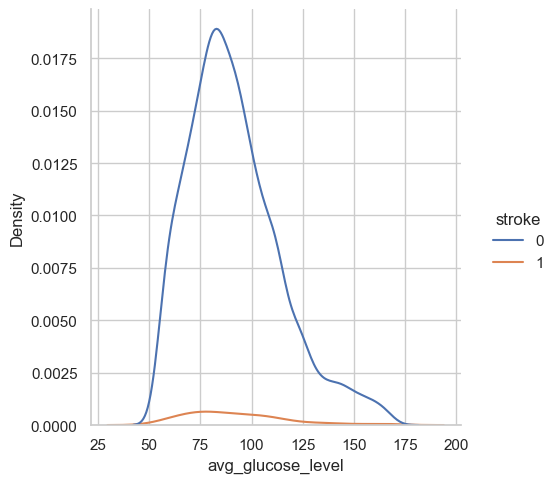

In [30]:
#density graph
#bmi vs stroke 
#avg glucose vs stroke
sns.displot(data=df,x='bmi',hue='stroke',kind ='kde')
sns.displot(data=df,x='avg_glucose_level',hue='stroke',kind ='kde')

    



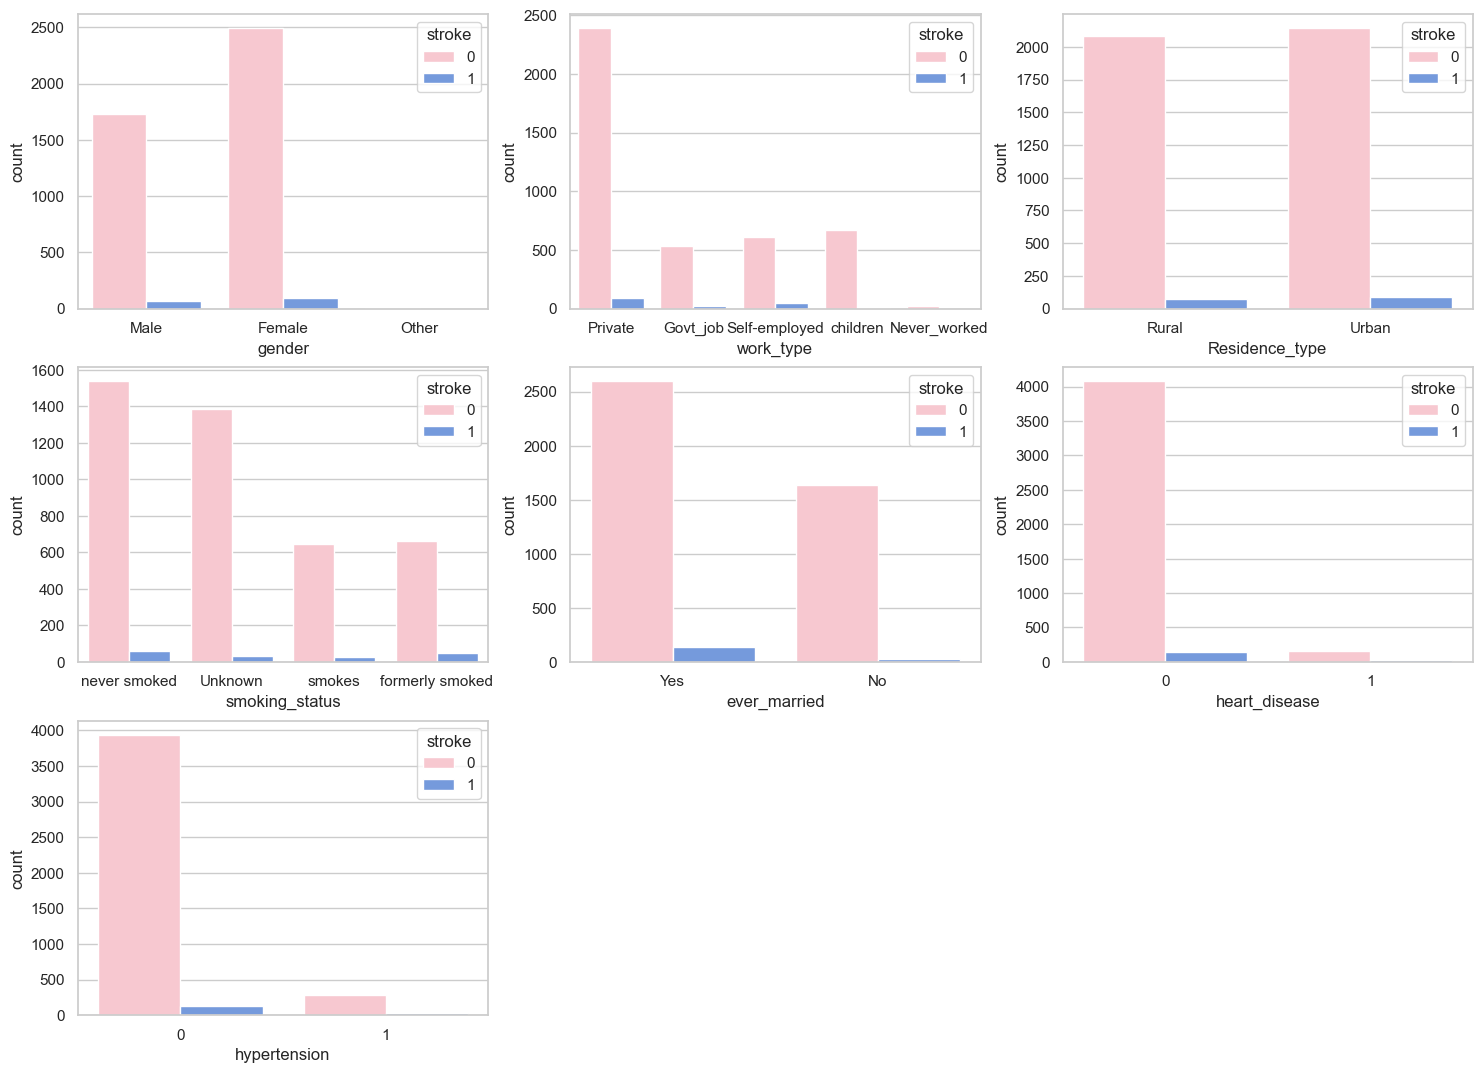

In [31]:
cols=['gender','work_type','Residence_type','smoking_status','ever_married','heart_disease','hypertension']
plt.figure(figsize=(18, 13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=cols[i], hue='stroke',data=df ,palette=custom_palette)

In [32]:

from sklearn.model_selection import train_test_split 
#to train test split the data
from sklearn.preprocessing import StandardScaler
# to make mean 0 sd 1 to normalise and make scales same 
from sklearn.metrics import confusion_matrix ,accuracy_score ,classification_report
#confusion matrix checks the working or correctness of the model by forming a matrix of true flase positives and negetives 
#accuracy score provdes the overall accuracy 
#classification report gives deeper indepth accuracy analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#next is data reassembling 

In [33]:
df_0=df[df.iloc[:,-2]==0]
# to create a dataframe containing the last column of the dataset and all the rows of  the last column, then check if its equal to =0 then enitre dataframe od 0 wlaa isidsplayed df[] 

df_1=df[df.iloc[:,-2]==1]
df['stroke'].value_counts()
#count to chekc if classes are blaanced or not 

stroke
0    4226
1     165
Name: count, dtype: int64

In [34]:
from sklearn.utils import resample 
df_1=resample(df_1,replace=True,n_samples=df_0.shape[0],random_state=123)
#since df1 is much less than df0 we resample to make the count equal isme jo sample data h usko bar bar duplicate rkte taki count same hojaye ,random state is any integer put kro taki when you run code again resampling same hi ho alg na ho 
df=np.concatenate((df_0,df_1))

#two brackets in concatenate - 
df=pd.DataFrame(df)
df.columns=['gender','age','hypertension','heart_diesease','ever_married','work_type','residence','avg_glucose_level','bmi','smoking_status','stroke','age_group']
df.shape
df['stroke'].value_counts()
#to check if both equal
df.head()
df = df.drop(columns=['age_group'])


In [35]:
from sklearn.preprocessing import LabelEncoder

# Define the columns you want to label encode
columns_to_encode = ['gender', 'ever_married', 'work_type', 'residence', 'smoking_status']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Now, the specified categorical columns are converted to numeric values without creating new columns.
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_diesease', 'ever_married',
       'work_type', 'residence', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')


In [36]:
df.head()

gender   age hypertension heart_diesease  ever_married  work_type  \
0       1   3.0            0              0             0          4   
1       1  58.0            1              0             1          2   
2       0   8.0            0              0             0          2   
3       0  70.0            0              0             1          2   
4       1  14.0            0              0             0          1   

   residence avg_glucose_level   bmi  smoking_status stroke  
0          0             95.12  18.0               0      0  
1          1             87.96  39.2               2      0  
2          1            110.89  17.6               0      0  
3          0             69.04  35.9               1      0  
4          0            161.28  19.1               0      0

In [37]:
#data split 
X=df.drop('stroke',axis=1)
#we create a new dataframe with no stroke colu,mn as it has to be predicted axis=1 means column needs tto be dropped 
Y=pd.to_numeric(df['stroke'])


In [38]:
scaler=StandardScaler()
#to have mean 0 sd 1
X=scaler.fit_transform(X)


In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=123)  
#x_train =independent var ,x_test=testing ,y_train=dependent,test sizze=0.20 means 20 for testing ,80 for training 

In [96]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [97]:
Y_pred = tree_model.predict(X_test)

accuracy_score(Y_test, Y_pred)



0.8036664695446482

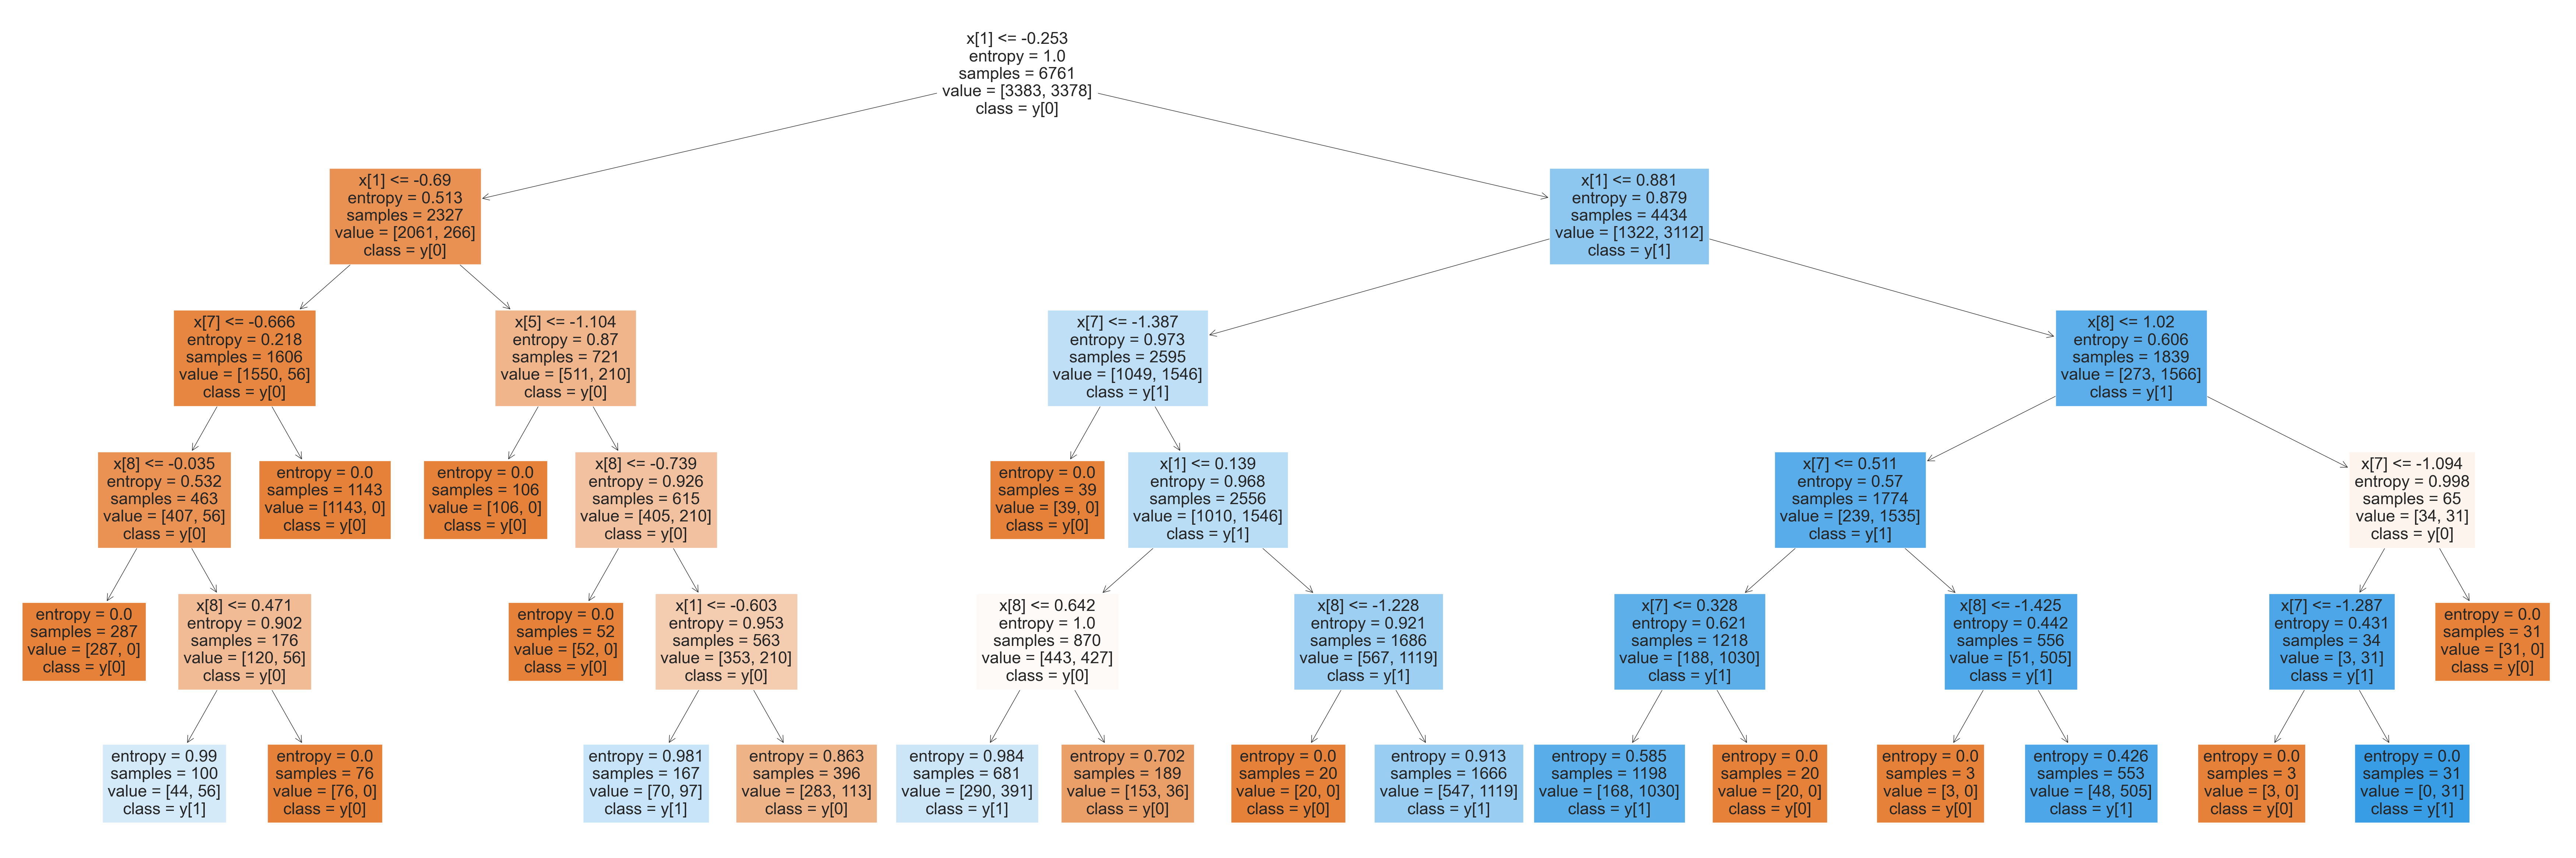

In [98]:

# Plot the decision tree
# Increase the size of the figure and plot the decision tree
plt.figure(figsize=(90, 30))  # Adjust the figure size as needed
plot_tree(tree_model, filled=True, class_names=True)
plt.show()

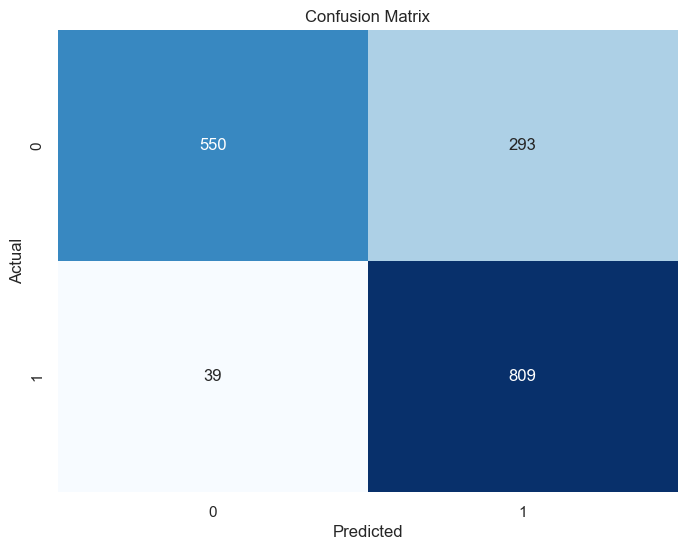

In [99]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap with pink color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=tree_model.classes_, yticklabels=tree_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [102]:
from sklearn.metrics import classification_report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       843
           1       0.73      0.95      0.83       848

    accuracy                           0.80      1691
   macro avg       0.83      0.80      0.80      1691
weighted avg       0.83      0.80      0.80      1691



In [77]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train,Y_train)
Y_pred = tree_model.predict(X_test)

accuracy_score(Y_test, Y_pred)



0.9822590183323477

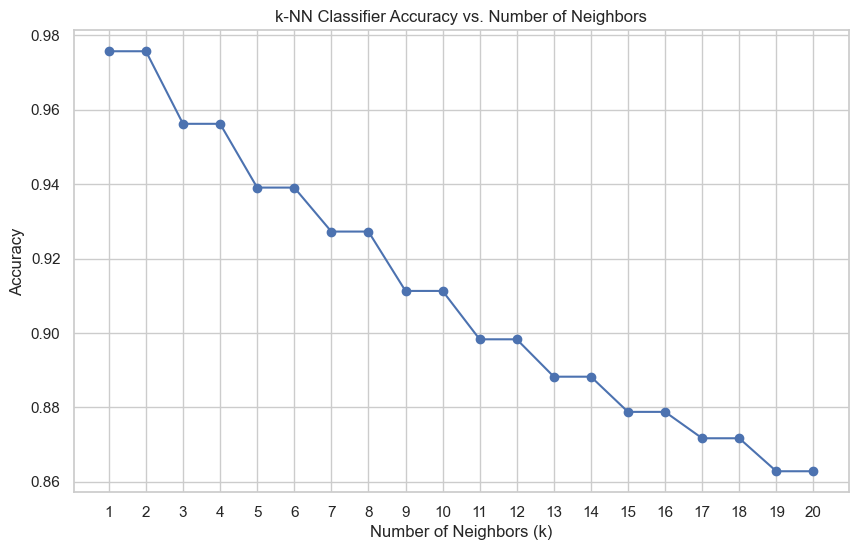

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, Y_train, X_test, and Y_test are your training and testing data
k_values = np.arange(1, 21)  # Consider k values from 1 to 20 for example
accuracies = []

for k in k_values:
    # Create and train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    # Make predictions on the test data
    Y_pred = knn.predict(X_test)
    
    # Calculate accuracy and append it to the list of accuracies
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)

# Plotting the accuracy vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Classifier Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [105]:
from sklearn.neighbors import KNeighborsClassifier

# Optimal k value (replace this with the actual optimal k value you found)
optimal_k = 3  # For example, if 5 is the optimal k

# Create the final k-NN classifier with the optimal k value
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the final model using the entire training dataset
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [106]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data using the final model
Y_pred_final = knn.predict(X_test)

# Calculate accuracy of the final model
accuracy_final = accuracy_score(Y_test, Y_pred_final)
print("Final Model Accuracy:", accuracy_final)


Final Model Accuracy: 0.9562389118864577


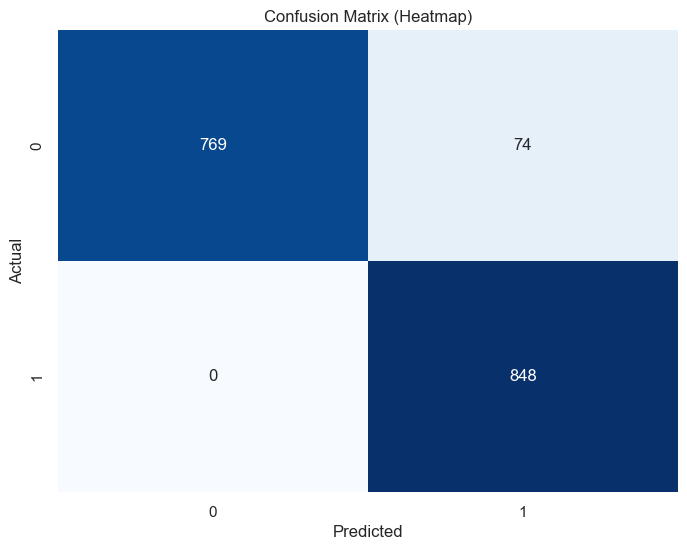

In [108]:
conf_matrix = confusion_matrix(Y_test, knn.predict(X_test))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Heatmap)')
plt.show()

In [107]:
from sklearn.metrics import classification_report
class_report = classification_report(Y_test, knn.predict(X_test))
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       843
           1       0.92      1.00      0.96       848

    accuracy                           0.96      1691
   macro avg       0.96      0.96      0.96      1691
weighted avg       0.96      0.96      0.96      1691



In [43]:
svm = SVC()
svm.fit(X_train , Y_train)
Y_pred = svm.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8533412182140745

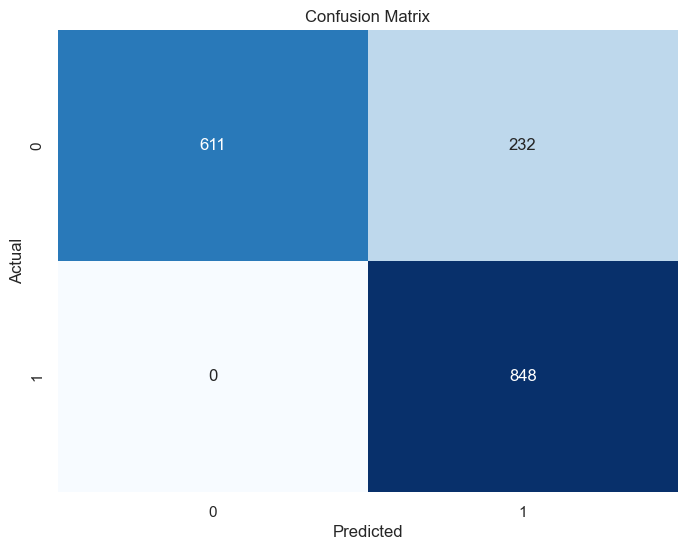

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       843
           1       0.79      1.00      0.88       848

    accuracy                           0.86      1691
   macro avg       0.89      0.86      0.86      1691
weighted avg       0.89      0.86      0.86      1691



In [82]:

# Create confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [109]:
# Generate classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       843
           1       0.79      1.00      0.88       848

    accuracy                           0.86      1691
   macro avg       0.89      0.86      0.86      1691
weighted avg       0.89      0.86      0.86      1691



In [87]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [88]:
Y_pred = lr_model.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7764636309875813

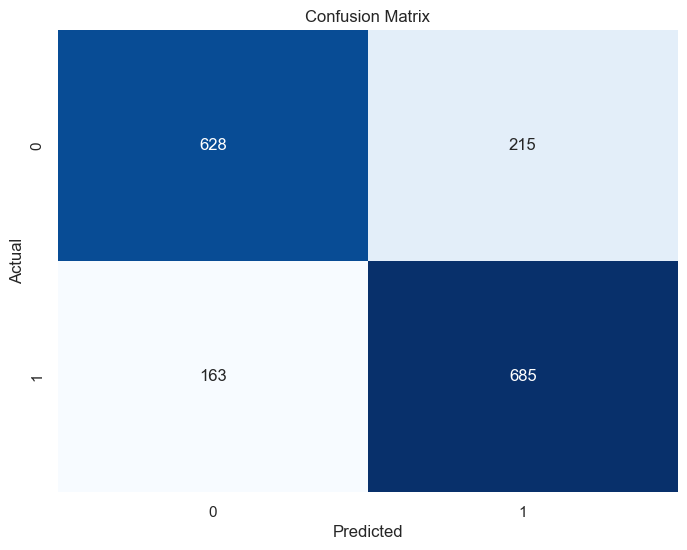

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       843
           1       0.76      0.81      0.78       848

    accuracy                           0.78      1691
   macro avg       0.78      0.78      0.78      1691
weighted avg       0.78      0.78      0.78      1691



In [89]:

# Create confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [110]:
# Generate classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       843
           1       0.79      1.00      0.88       848

    accuracy                           0.86      1691
   macro avg       0.89      0.86      0.86      1691
weighted avg       0.89      0.86      0.86      1691



In [90]:
rf_model = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state = 123)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=123)

In [47]:
Y_pred = rf_model.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9958604376108812

In [48]:
from sklearn.tree import plot_tree


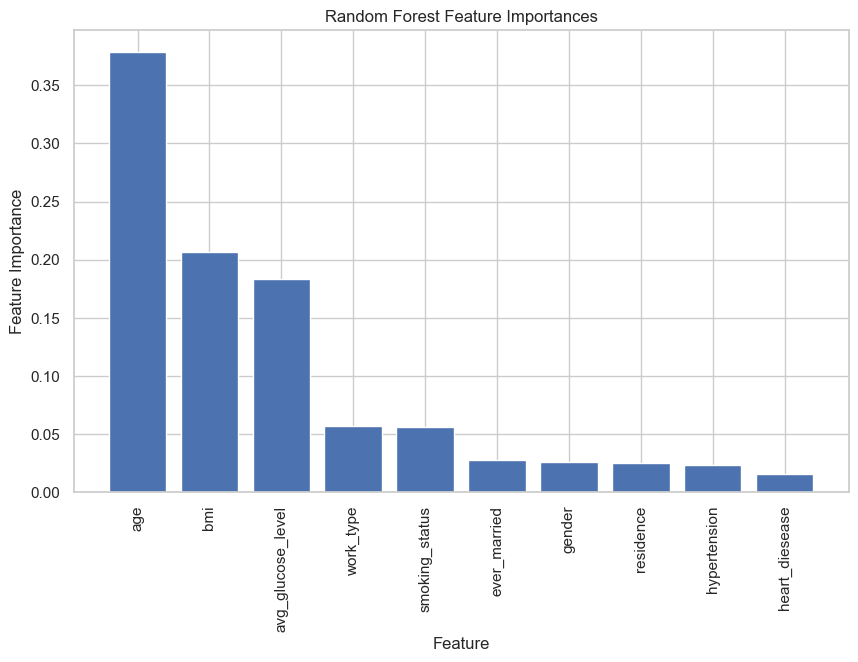

In [49]:

feature_names = df.columns[:-1]  # Exclude the 'stroke' column

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Create a bar plot of the top features
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

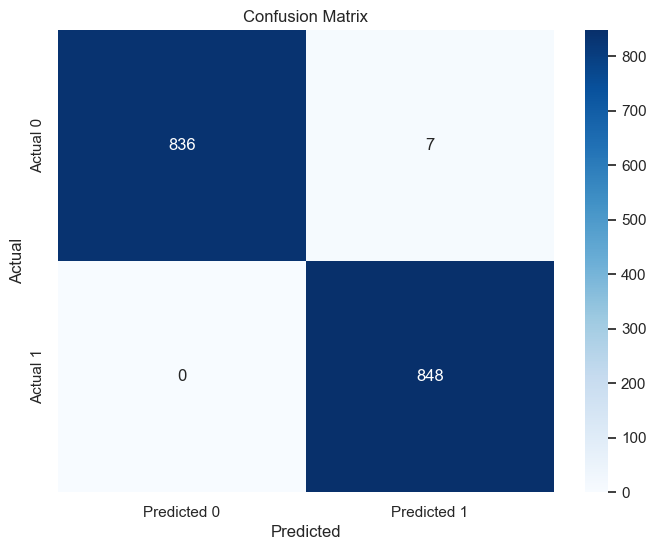

In [50]:
Y_pred = rf_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [111]:

# Generate and print the classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       843
           1       0.79      1.00      0.88       848

    accuracy                           0.86      1691
   macro avg       0.89      0.86      0.86      1691
weighted avg       0.89      0.86      0.86      1691

